# **Modelos de Treinamento Supervisionado**

# Machine Learning


## Support Vector Machine

In [1]:
#Monta o Kernel 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importa bibliotecas básicas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [3]:
#Importa arquivo de dados
from google.colab import files
uploaded = files.upload()

Saving DataETo.csv to DataETo.csv


In [4]:
#Cria o objeto com os dados iportados
data = pd.read_csv("/content/DataETo.csv")

In [5]:

#Mostra as 5 primeiras linhas do objeto 'data'
#DOY: Day of the Year; Rad: Radiação Solar (MJ/m²/dia); Vmed: Velocidade média do vento (m/s)
#Tmed: Temperatura média do ar (°C); URmed: Umidade relativa média do ar (%); ETo: Evapotranspiração de Referência (mm/dia) 
data.head()

,DOY,Rad,Vmed,Tmed,Urmed,Eto
0,1,22.6,0.6,21.3,63.2,5.40
1,2,17.9,0.5,22.2,68.8,5.20
2,3,19.2,1.0,23.3,72.4,3.68
3,4,13.2,1.2,21.6,80.6,2.64
4,5,18.3,0.8,22.0,77.4,3.97


In [ ]:
#Plota gráficos de dispersão entre as variáveis e gráficos de distribuição dos dados
sns.pairplot(data, kind="reg");

In [9]:
#Exclui a(s) variável(is) alvo do modelo
X = data.drop(['Eto'], axis=1)

In [10]:
#Dataset sem a variável "alvo"
X.head()

,DOY,Rad,Vmed,Tmed,Urmed
0,1,22.6,0.6,21.3,63.2
1,2,17.9,0.5,22.2,68.8
2,3,19.2,1.0,23.3,72.4
3,4,13.2,1.2,21.6,80.6
4,5,18.3,0.8,22.0,77.4


In [11]:
y = data['Eto'] #atribui a variável alvo


In [12]:
y.head()

0    5.40
1    5.20
2    3.68
3    2.64
4    3.97
Name: Eto, dtype: float64

In [13]:
X.shape, y.shape #Mostra quantidade de linhas e colunas das variáveis - Dados referentes a 1 ano de observações diárias

((365, 5), (365,))

In [14]:
#Importa a biblioteca para divisão dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [15]:
#Dividindo os dados em conjunto de treinamento e conjunto de teste (30% dos dados para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [16]:
X_train.shape, y_train.shape #Tamanho do conjunto de treinamento

((255, 5), (255,))

In [17]:
X_test.shape, y_test.shape #Tamanho do conjunto de teste

((110, 5), (110,))

In [21]:
y_train_pred = ModelSV.predict(X_train)# Aplica o modelo SV no conjunto de treinamento

In [19]:
y_pred = ModelSV.predict(X_test) #Aplica o modelo no conjunto de teste

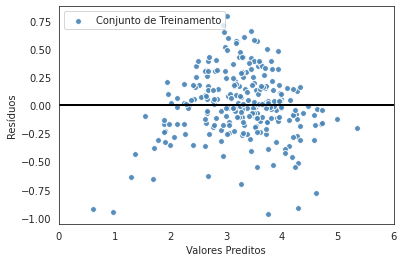

In [22]:
#Gráficos de Resíduos do conjunto de treinamento
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',edgecolor='white',
            marker='o',s=35,alpha=0.9,label='Conjunto de Treinamento')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=6,lw=2,color='black')
plt.xlim([0,6])
plt.show()

**Análise de resíduos (Métricas de Erro)**

**Aplicação das métricas de erro RMSE, MAE e MSE**

In [47]:
from sklearn.metrics import mean_squared_error #importa métrica de erro MSE
from sklearn.metrics import mean_absolute_error

In [48]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) #aplica o RMSE no conjunto de teste

In [49]:
print('\nRMSE é: {} '.format(rmse)) #Mostra o valor do RMSE


RMSE é: 0.3338344267595366 


In [50]:
mae = (mean_absolute_error(y_test, y_pred)) #aplica o MAE no conjunto de teste

In [51]:
print('\nMAE é: {} '.format(mae)) #Mostra o valor do MAE


MAE é: 0.23633599507098751 


In [52]:
from sklearn.metrics import explained_variance_score #Importa o teste Variance Score

In [53]:
 explained_variance_score(y_test, y_pred)#Teste Variance Score no conjunto de teste

0.821491751752335

In [54]:
mse = (mean_squared_error(y_test, y_pred)) #Aplica o MSE no conjunto de teste

In [55]:
print('\nMSE é: {} '.format(mse))


MSE é: 0.11144542448986842 


In [56]:
SV_results=pd.DataFrame() #Cria dataframe vazio para armazenar os resultados

In [57]:
SV_results['valor_observado'] = y_test #Atribui os valores observados do conj. de teste

In [58]:
SV_results['valor_predito_SV'] = y_pred #Atribui os valores preditos no conjunto de teste

In [59]:
SV_results.to_csv('/content/ETOpred.csv',header=True) #Exporta os resultados para .CSV

In [60]:
SV_results.head()

,valor_observado,valor_predito_SV
193,2.35,2.585974
33,3.10,3.226239
15,2.59,2.427985
309,4.61,4.573269
57,3.10,3.115451


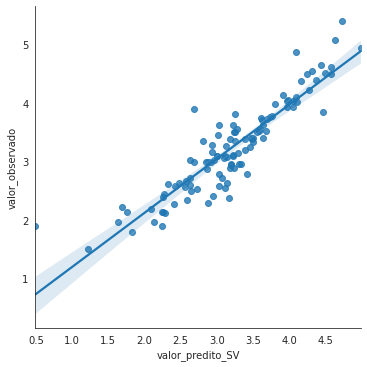

In [63]:
#Gráfico de Valores Preditos vs Valores Observados
%matplotlib inline
sns.lmplot(x="valor_predito_SV", y="valor_observado", palette="Pastel1", data=SV_results);

## Árvore de decisão

In [64]:
from sklearn.tree import DecisionTreeRegressor

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [65]:
regressor = DecisionTreeRegressor()

In [66]:
data.head()

,DOY,Rad,Vmed,Tmed,Urmed,Eto
0,1,22.6,0.6,21.3,63.2,5.40
1,2,17.9,0.5,22.2,68.8,5.20
2,3,19.2,1.0,23.3,72.4,3.68
3,4,13.2,1.2,21.6,80.6,2.64
4,5,18.3,0.8,22.0,77.4,3.97


In [68]:
X = data.drop(['Eto'], axis=1)

In [69]:
X.head()

,DOY,Rad,Vmed,Tmed,Urmed
0,1,22.6,0.6,21.3,63.2
1,2,17.9,0.5,22.2,68.8
2,3,19.2,1.0,23.3,72.4
3,4,13.2,1.2,21.6,80.6
4,5,18.3,0.8,22.0,77.4


In [70]:
y = data['Eto']

In [71]:
y.head()

0    5.40
1    5.20
2    3.68
3    2.64
4    3.97
Name: Eto, dtype: float64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [73]:
X_train.shape, y_train.shape

((255, 5), (255,))

In [74]:
X_test.shape, y_test.shape 

((110, 5), (110,))

In [75]:
ModelDT=regressor.fit(X_train, y_train)

In [76]:
y_pred = ModelDT.predict(X_test)

In [77]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) #aplica o RMSE no conjunto de teste

In [78]:
print('\nRMSE é: {} '.format(rmse)) #Mostra o valor do RMSE


RMSE é: 0.4169881184267616 


In [79]:
mae = (mean_absolute_error(y_test, y_pred)) #aplica o MAE no conjunto de teste

In [80]:
print('\nMAE é: {} '.format(mae)) #Mostra o valor do MAE


MAE é: 0.32190909090909087 


In [81]:
mse = (mean_squared_error(y_test, y_pred))

In [82]:
print('\nMSE é: {} '.format(mse))


MSE é: 0.17387909090909093 


In [83]:
explained_variance_score(y_test, y_pred)

0.7349553611133292

In [84]:
DT_results=pd.DataFrame()

In [85]:
DT_results['valor_predito_arvore'] = y_pred

In [86]:
DT_results['valor_observado'] = y_test.values

In [87]:
DT_results.to_csv('/content/DTpred.csv',header=True)

In [88]:
DT_results.head()

,valor_predito_arvore,valor_observado
0,4.52,4.67
1,4.27,3.82
2,2.32,2.53
3,4.65,4.77
4,2.64,2.33


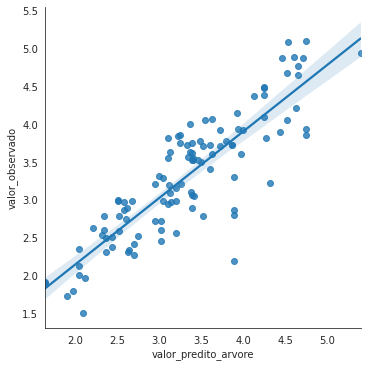

In [90]:
#Gráfico de Valores Preditos vs Valores Observados
%matplotlib inline
sns.lmplot(x="valor_predito_arvore", y="valor_observado", palette="Pastel1", data=DT_results);

## Random forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [92]:
rf_regressor = RandomForestRegressor()

In [93]:
data.head()

,DOY,Rad,Vmed,Tmed,Urmed,Eto
0,1,22.6,0.6,21.3,63.2,5.40
1,2,17.9,0.5,22.2,68.8,5.20
2,3,19.2,1.0,23.3,72.4,3.68
3,4,13.2,1.2,21.6,80.6,2.64
4,5,18.3,0.8,22.0,77.4,3.97


In [94]:
X = data.drop(['Eto'], axis=1)

In [96]:
y = data['Eto']

In [97]:
X.head()

,DOY,Rad,Vmed,Tmed,Urmed
0,1,22.6,0.6,21.3,63.2
1,2,17.9,0.5,22.2,68.8
2,3,19.2,1.0,23.3,72.4
3,4,13.2,1.2,21.6,80.6
4,5,18.3,0.8,22.0,77.4


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [99]:
X_train.shape, y_train.shape

((255, 5), (255,))

In [100]:
X_test.shape, y_test.shape 

((110, 5), (110,))

In [101]:
ModelRF=rf_regressor.fit(X_train, y_train)

In [102]:
y_pred = ModelRF.predict(X_test)

In [103]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) #aplica o RMSE no conjunto de teste

In [104]:
print('\nRMSE é: {} '.format(rmse)) #Mostra o valor do RMSE


RMSE é: 0.2838557050205741 


In [105]:
mae = (mean_absolute_error(y_test, y_pred)) #aplica o MAE no conjunto de teste

In [106]:
print('\nMAE é: {} '.format(mae)) #Mostra o valor do MAE


MAE é: 0.2223799999999999 


In [107]:
mse = (mean_squared_error(y_test, y_pred))

In [108]:
print('\nMSE é: {} '.format(mse))


MSE é: 0.08057406127272718 


In [109]:
explained_variance_score(y_test, y_pred)

0.8781828555147925

In [110]:
RF_results=pd.DataFrame()

In [111]:
RF_results['valor_predito_random_forest'] = y_pred

In [112]:
RF_results['valor_observado'] = y_test.values

In [113]:
RF_results.to_csv('/content/RFpred.csv',header=True) #Exporta os resultados para .CSV

In [114]:
RF_results.head()

,valor_predito_random_forest,valor_observado
0,4.4968,4.67
1,3.8799,3.82
2,2.5170,2.53
3,4.6291,4.77
4,2.4688,2.33


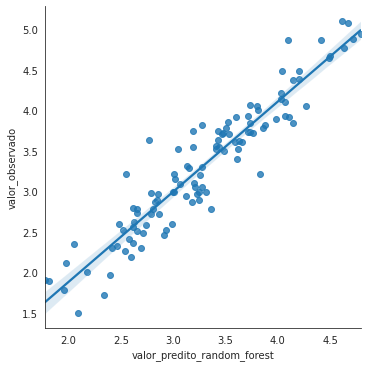

In [115]:
#Gráfico de Valores Preditos vs Valores Observados
%matplotlib inline
sns.lmplot(x="valor_predito_random_forest", y="valor_observado", palette="Pastel1", data=RF_results);